    # Arkadiusz Mamala - G00349088  Emerging Technologies Assigment

### Reasearch
    
    


#### Database that i have decided to used in this project is The Mist Database it has a training set of 60,000 and a test set of 10,000 which should be enough for me to train my web application to recognize drawing pathers of hand written didgits.




The software that i have decided to use in this project is PyCharm while in it having Keras, Tensorflow, PyPlot....


#  Neural network

##### A Neural Network


A Neural Network is a computer program that mimics the brains functions.An easy-to-understand introduction to neural networks: how can a computer learn to recognize patterns and make decisions like a human.

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAktPl6HWwjoFaLyjzIpDE2wfV4FfMz8IzFsYn8a8Id-nN0skK&s)

![image.png](https://www.codingdojo.com/blog/wp-content/uploads/What-is-artificial-neural-network.png)

Neural networks can usually be read from left to right. Here, the first layer is the layer in which inputs are entered. There are internals layers (called hidden layers) that do some math, and one last l
ayer that contains all the possible outputs.

#### Imports
* matplotlib.pyplot as plt is needed for displaying images/n
* numpy as np is needed for our image arrays 
* tenserflow is needed for keras and the model 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#https://stackoverflow.com/a/50467697
#for graph error
graph = tf.get_default_graph()

#### Reading in the minst
* We need this database to train the model and to test the model 
* It consists of 60000 training images and 10000 testing images 


In [2]:
#Reading in the database for images to test 
mnist = tf.keras.datasets.mnist  
# 28x 28 image of hand written didgits 0-9

* Deviding the data into two sets the train set and the test set
* reshaping the images to 784 which is the rows by cols 28x28 =784  
* casting both arrays to float 32
* then deviding by 255 so comes out as 1s or 0s as its easier to read for machine


In [3]:
# This Load_data() method returns both the training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#reshaping the images 28X28= 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

* Printing out to the screen the shape of both the x_test and x_train Which is 28 x 28 = 784
* printing y_train of the first 10 values for verification

In [4]:
# the shame of the images
print(x_train.shape)
print(x_test.shape)
# Each image has the dimensions 28 x 28:

# The y_train of the first 10 values
print(y_train[:9 + 1])

(60000, 784)
(10000, 784)
[5 0 4 1 9 2 1 3 1 4]


### Models
* Sequential - The Sequential model is a linear stack of layers.
* We create Sequential model because its much more flexible and you create layer after layer.
* It also doesnt allow you to to share layers or have multiple imputs or outputs.



In [5]:
# creating a new sequential model
model = tf.keras.models.Sequential()

### Adding layers
* Adding four layers 
* Using the dense layer type 
* We have 784 nodes in each input layer
* Activation - An activation function allows models to take into account nonlinear relationships
* Activation is set to "relu"
* Relu (Rectified Linear Activation) is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero
* Drop out layer to avoid overfitting of model

In [6]:

#adding layers to our model 
model.add(tf.keras.layers.Dense(784, activation='relu',input_shape=(784,))) # Use input_shape=(28,28) for unflattened data.
model.add(tf.keras.layers.Dense(784, activation='relu'))

# Dropout layer exists to avoid overfitting of model
model.add(tf.keras.layers.Dropout(0.2))

# 10 nuerons in the final layer to coincide with the 10 digits in the MNIST dataset
# softmax maps output to a [0,1] range, it is for probability distribution
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Compiling the Model
#### Optimiser
* Our optimiser is set to 'adam' this controls the learning rate
* This optimizer adjusts the learning rate through training 
#### Loss 
* Our loss is set to 'sparse_categorical_crossentropy'
* We use this one because we are dealing with integers
#### metrics 
* We set our metrics to 'accuracy'

In [7]:
# sparse_categorical_crossentropy loss needed in case we have an integer-dependent variable
#using the adam optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the model
* We are training the model using the fit method 
* batch_size is the amount that will be tested
* epochs is set to 3 therefore this will be carried out 3 times
*

In [9]:
# Train the model using the .fit() method
# Epoch is the amout of time it goes throug this
his = model.fit(x_train, y_train, batch_size=10, epochs=2, verbose=1,
          validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0844 - acc: 0.9760 - val_loss: 0.1019 - val_acc: 0.9739
Epoch 2/2
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0708 - acc: 0.9797 - val_loss: 0.1046 - val_acc: 0.9755


#### Loss and Accuracy
* Here we are printing out to the screen the loss of the model and the accuracy from training it
* Mode summary is also printed out here showing the layers, shape and Param

In [10]:
#showing the loss and accuracy
evaluation = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', evaluation[0])
print('Test accuracy:', evaluation[1])
model.summary()

Test loss: 0.1046233136652556
Test accuracy: 0.9755
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


Here we are plotting the loss and accuracy out to the user to see using plt 

####Saving
* model is saved as AreksModel.h5
* saved as h5 file because its designed to store and organize large amounts of data
* loding in the model then as a 'new_model'
* predicting x_test
* printing it out after

In [11]:
# Saving the Model as AreksModel.model
model.save('AreksModel.h5')
# Loading the saved model
# Save it in a variable new_model
new_model = tf.keras.models.load_model('AreksModel.h5')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### Information
* printing out the length of x_test values and the shape for validation of x_test and x_test[0] 


In [12]:
#checking the length of x_test
print(f"xtest Lenght =  { len(x_test) }")
#checking the length of x_test [0]
print(f"xtest Lenght of [0] =  { len(x_test[0]) }")
# the test image shape
print(f'Image shape: {x_test.shape}')
# the test image shape value
print(f'Image shape: {x_test.shape[0]}')

xtest Lenght =  10000
xtest Lenght of [0] =  784
Image shape: (10000, 784)
Image shape: 10000


#### Testing the model
* first printing out the image selected for the test
* Returns normalized output for each digit and also uses argmax to return the actual prediction



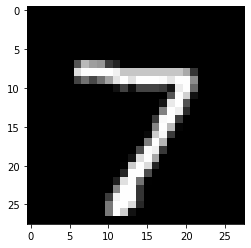

7


In [13]:
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.show()

# Returns normalized output for each digit and also uses argmax to return the actual prediction
# print(loadedModel.predict(test_img[77:78])
np.argmax(new_model.predict(x_test[0:1]))
print(np.argmax(new_model.predict(x_test[0:1])))


#### Testing the model
* first printing out the image selected for the test
* Returns normalized output for each digit and also uses argmax to return the actual prediction


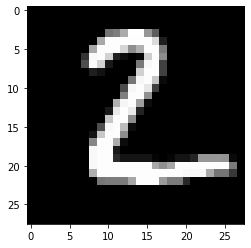

2


In [14]:
plt.imshow(x_test[1].reshape(28, 28), cmap="gray")
plt.show()

# Returns normalized output for each digit and also uses argmax to return the actual prediction
# print(loadedModel.predict(test_img[77:78])
np.argmax(new_model.predict(x_test[1:2]))
print(np.argmax(new_model.predict(x_test[1:2])))


#### Testing the model
* first printing out the image selected for the test
* Returns normalized output for each digit and also uses argmax to return the actual prediction


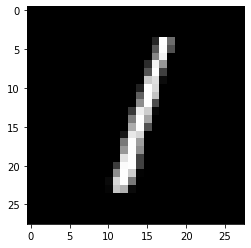

1


In [15]:
plt.imshow(x_test[2].reshape(28, 28), cmap="gray")
plt.show()

# Returns normalized output for each digit and also uses argmax to return the actual prediction
# print(loadedModel.predict(test_img[77:78])
np.argmax(new_model.predict(x_test[2:3]))
print(np.argmax(new_model.predict(x_test[2:3])))


## References
    
    **https://machinelearningmastery.com/keras-functional-api-deep-learning/
    
    **https://www.tensorflow.org/guide/keras/functional
    
    **https://keras.io/getting-started/functional-api-guide/
    
    **https://keras.io/models/about-keras-models/
    
    **https://www.sitepoint.com/keras-digit-recognition-tutorial/
    https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/